In [271]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from collections import Counter
from scipy import stats

from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [82]:
filename='top50.csv'
df=pd.read_csv(filename,encoding='ISO-8859-1')
df.head(15)

,Track_id,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Track_id            50 non-null int64
Track_Name          50 non-null object
Artist_Name         50 non-null object
Genre               50 non-null object
Beats_Per_Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness_dB         50 non-null int64
Liveness            50 non-null int64
Valence             50 non-null int64
Length              50 non-null int64
Acousticness        50 non-null int64
Speechiness         50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [84]:
df['Track_Name'] = df['Track_Name'].astype('category')
df['Artist_Name'] = df['Artist_Name'].astype('category')
df['Genre'] = df['Genre'].astype('category')

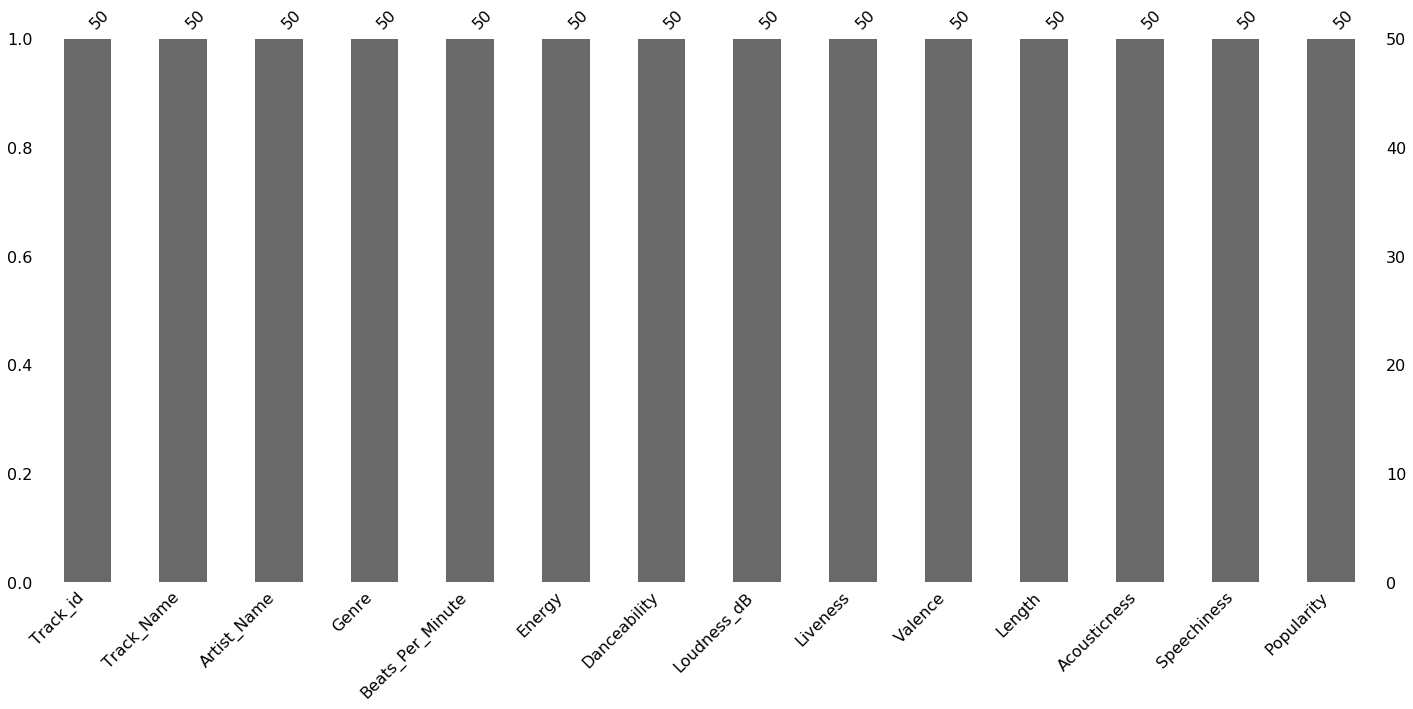

In [85]:
missingno.bar(df) # no missing values

To check: Unique count of non-numeric data
Track_Name     50
Artist_Name    38
Genre          21
dtype: int64


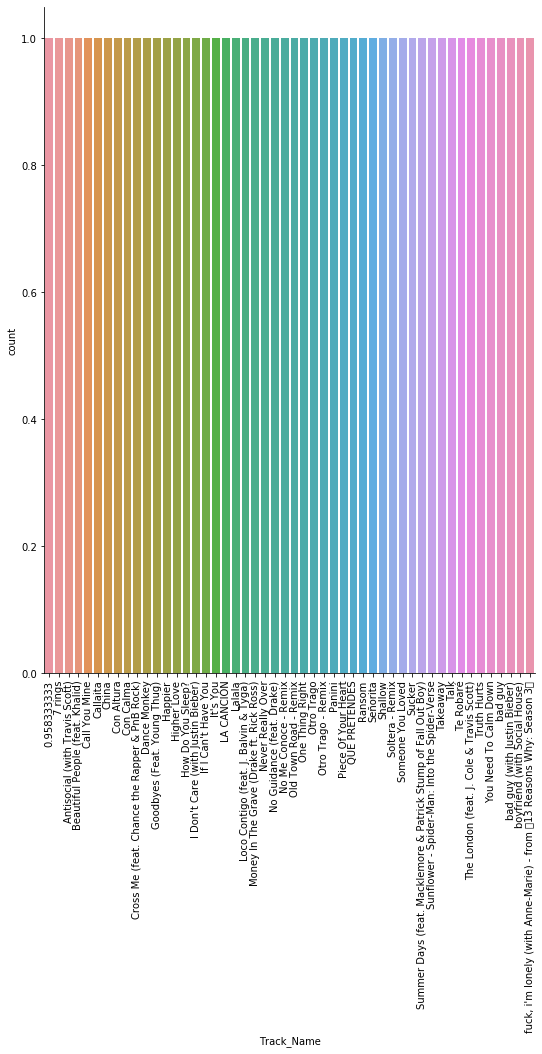

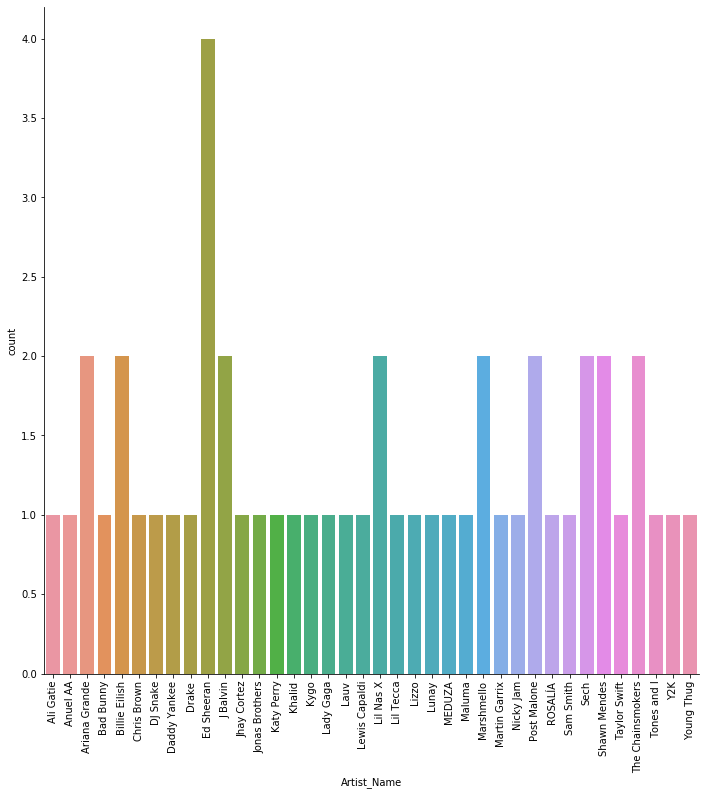

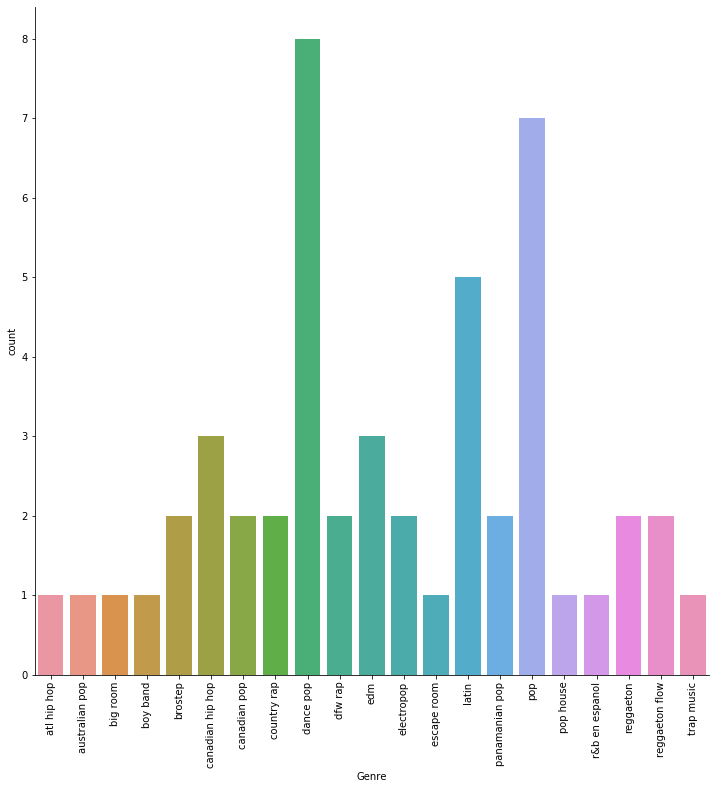

In [345]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, height = 10)
        fig.set_xticklabels(rotation=90)
        plt.show()
        
categorical_eda(df)

In [99]:
df.describe()

,Track_id,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,25.500,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,14.577,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,1.000,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,13.250,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,25.500,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,37.750,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,50.000,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [243]:
# count of songs by each artist

Artist_count = df["Artist_Name"].value_counts()
print(Artist_count, "\n")

Song_count = df.groupby('Artist_Name')['Track_Name'].value_counts()
print(Song_count)


Ed Sheeran          4
The Chainsmokers    2
Ariana Grande       2
Shawn Mendes        2
Sech                2
Billie Eilish       2
Post Malone         2
Lil Nas X           2
Marshmello          2
J Balvin            2
Young Thug          1
Katy Perry          1
Jonas Brothers      1
Jhay Cortez         1
DJ Snake            1
Drake               1
Daddy Yankee        1
Kygo                1
Chris Brown         1
Bad Bunny           1
Anuel AA            1
Khalid              1
Lewis Capaldi       1
Lady Gaga           1
Lauv                1
Y2K                 1
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Martin Garrix       1
Nicky Jam           1
ROSALÍA             1
Sam Smith           1
Taylor Swift        1
Tones and I         1
Ali Gatie           1
Name: Artist_Name, dtype: int64 

Artist_Name       Track_Name                                                          
Ali Gatie         It's You                 

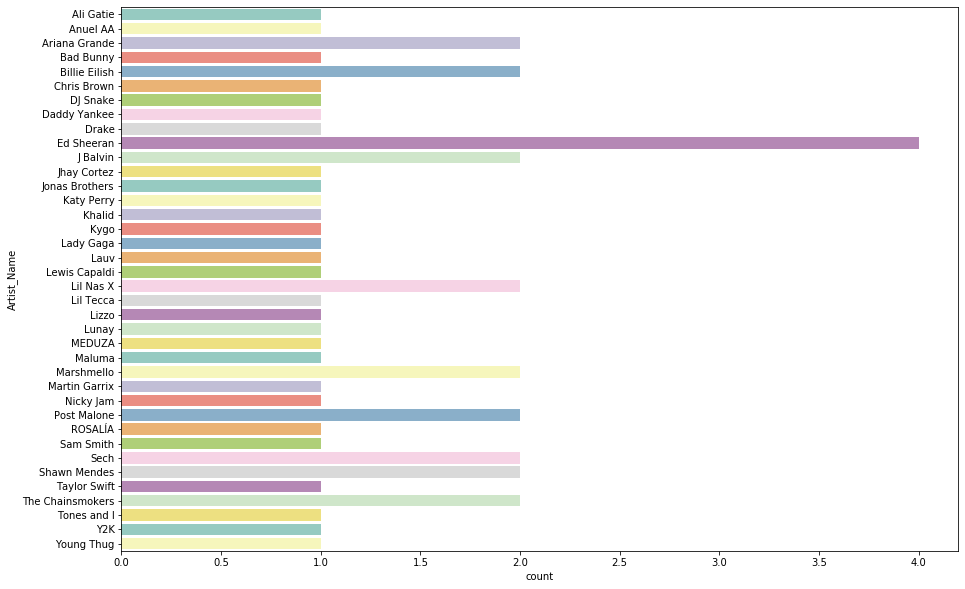

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(df['Artist_Name'], palette = "Set3")

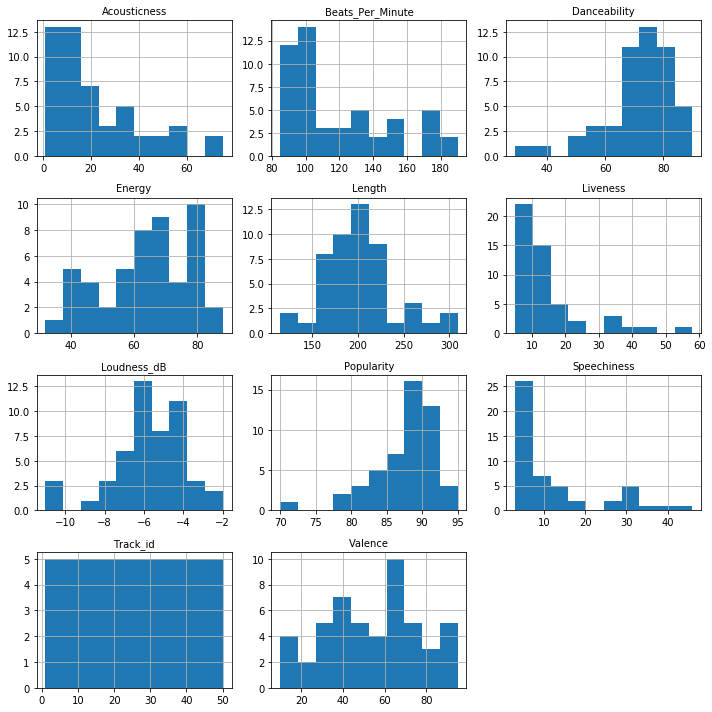

In [111]:
fig = df.hist(figsize=(10, 10),)
[x.title.set_size(10) for x in fig.ravel()]
plt.tight_layout()
plt.show()

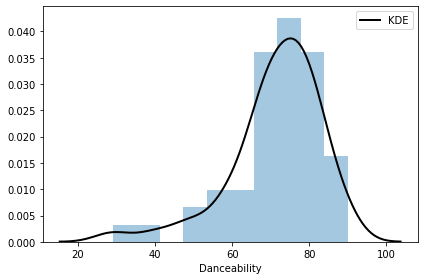

Transformed Danceability


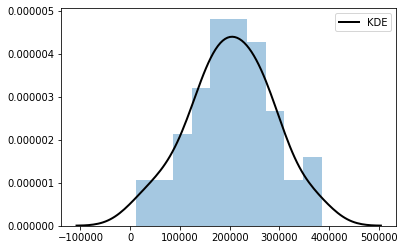

In [167]:
fig = sns.distplot(df['Danceability'], bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.tight_layout()
plt.show()

transform_val1 = np.asarray(df[['Danceability']].values)
transform_df1 = stats.boxcox(transform_val1)[0]
print("Transformed Danceability")
fig = sns.distplot(transform_df1, bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.show()

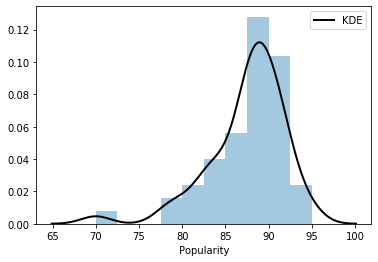

Transformed Popularity


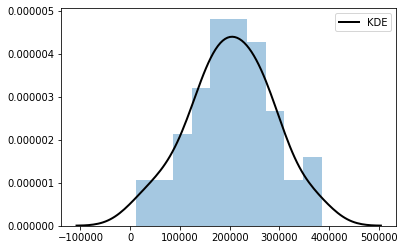

In [166]:
sns.distplot(df['Popularity'],bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.show()

transform_val2 = np.asarray(df[['Popularity']].values)
transform_df2 = stats.boxcox(transform_val1)[0]
print("Transformed Popularity")
fig = sns.distplot(transform_df2, bins=10,kde=True,kde_kws={"color": "k", "lw": 2, "label": "KDE"})
plt.show()


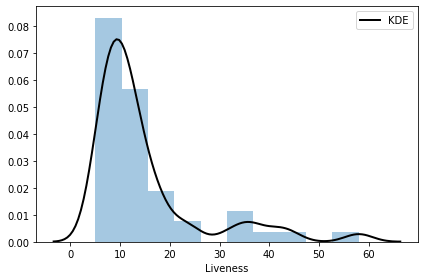

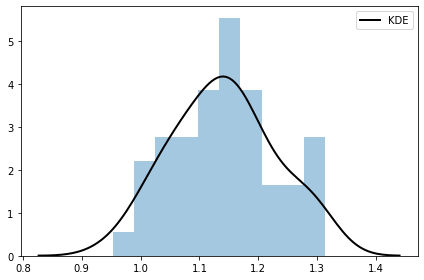

In [165]:
sns.distplot(df['Liveness'], bins =10, kde = True, kde_kws = {"color" : "k" , "lw" :2 , "label" : "KDE"})
plt.tight_layout()
plt.show()

transform_val3 = np.asarray(df[['Liveness']].values)
transform_df3 = stats.boxcox(transform_val3)[0]
sns.distplot(transform_df3, bins=10 , kde = True, kde_kws = {"color" : "k", "lw" : 2 , "label" : "KDE"})
plt.tight_layout()
plt.show()

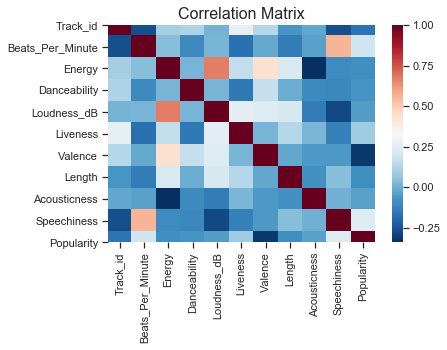

In [84]:
# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

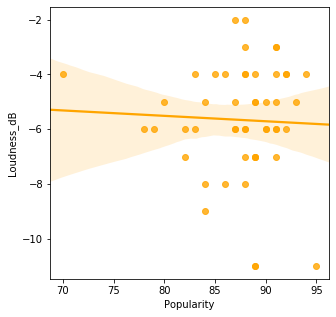

In [174]:
# Analysing the relationship between energy and loudness

fig=plt.subplots(figsize=(5,5))
sns.regplot(x='Popularity',y='Loudness_dB',data=df,color='orange')

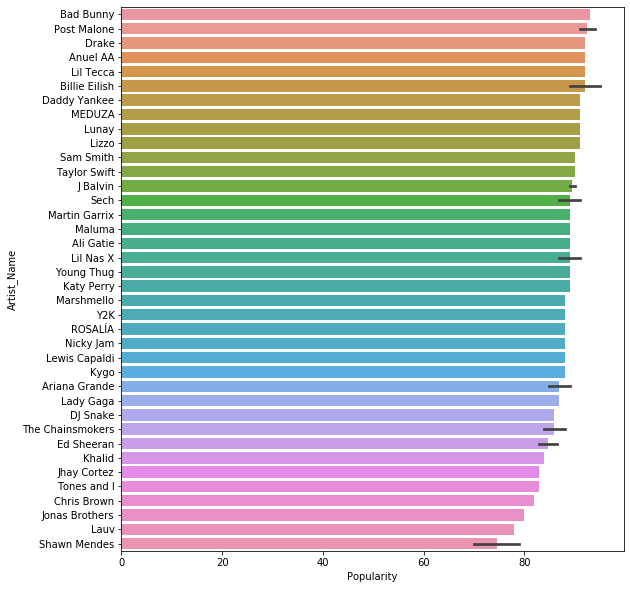

In [259]:
fig=plt.subplots(figsize=(9,10))
result = df.groupby(["Artist_Name"])['Popularity'].aggregate(np.mean).reset_index().sort_values('Popularity', ascending = False)
sns.barplot(x='Popularity',y= 'Artist_Name', data = df, order = result['Artist_Name'] )

In [342]:
# Liner Regression
# dependent variable : Popularity
# independent variable :  Loudness_dB , Danceability, Liveness, Energy, Acousticness, Speechiness 
from sklearn.metrics import mean_squared_error

x = df.loc[ : ,['Loudness_dB' , 'Danceability' , 'Liveness', 'Energy' , 'Acousticness', 'Speechiness']].values

y = df.loc[:,['Popularity']].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.40)

model = LinearRegression()

model.fit(x_train, y_train)


y_pred = model.predict(x_test)


print("Actual\n" , y_test)
print("\nPredicted\n", y_pred)

rmse_test = mean_squared_error(y_test,y_pred) ** (0.5)
print('\nRMSE on test dataset : ', rmse_test)



Actual
 [[89]
 [91]
 [95]
 [90]
 [89]
 [90]
 [84]
 [84]
 [80]
 [88]
 [88]
 [88]
 [93]
 [89]
 [89]
 [88]
 [82]
 [92]
 [87]
 [83]]

Predicted
 [[86.41003627]
 [84.06566538]
 [87.8773085 ]
 [87.92901533]
 [87.36183512]
 [88.88758487]
 [89.68848803]
 [89.76066287]
 [87.64024524]
 [89.50743363]
 [84.09803616]
 [95.47046464]
 [86.17030008]
 [91.91096348]
 [89.7205075 ]
 [83.82997277]
 [90.96527961]
 [89.92311438]
 [88.51212452]
 [82.4385486 ]]

RMSE on test dataset :  4.854260398135413


Text(0, 0.5, 'Predicted values')

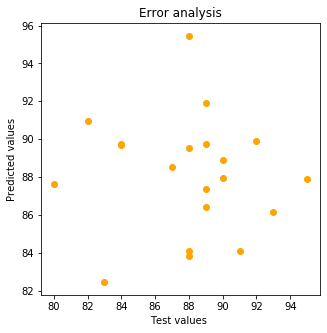

In [343]:
fig=plt.subplots(figsize=(5,5))
plt.scatter(y_test,y_pred,color='orange')
plt.title('Error analysis')
plt.xlabel('Test values ')
plt.ylabel('Predicted values')